In [54]:
import json
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
f = open('annotations.json',)
data = json.load(f)
f.close()

In [111]:
data[0]['annotations'][0]['result']

[{'value': {'choices': ['$8']},
  'id': '6NLMwHBGZF',
  'from_name': 'topk',
  'to_name': 'text',
  'type': 'choices'},
 {'value': {'choices': ['Yes']},
  'id': 'GWNuH5jkka',
  'from_name': 'mutlitoken',
  'to_name': 'text',
  'type': 'choices'},
 {'value': {'choices': ['No']},
  'id': 'BiD-69yYnW',
  'from_name': 'languagemix',
  'to_name': 'text',
  'type': 'choices'},
 {'value': {'choices': ['Yes']},
  'id': 'VjzBb_uPcG',
  'from_name': 'namedentity',
  'to_name': 'text',
  'type': 'choices'},
 {'value': {'choices': ['Yes']},
  'id': 'U6o_-zNPdw',
  'from_name': 'namedentity_indian',
  'to_name': 'text',
  'type': 'choices'},
 {'value': {'text': ['end bengal violence']},
  'id': 'Pz7WYxcHC0',
  'from_name': 'answer',
  'to_name': 'text',
  'type': 'textarea'},
 {'value': {'start': 3, 'end': 9, 'text': 'bengal', 'labels': ['Location']},
  'id': 'R8MKDu7JS3',
  'from_name': 'charner',
  'to_name': 'text',
  'type': 'labels'}]

In [113]:
for elt in data:
    for sub_elt in elt['annotations'][0]['result']:
        if sub_elt['from_name'] == 'charner':
            print(sub_elt)

{'value': {'start': 0, 'end': 5, 'text': 'varun', 'labels': ['Person']}, 'id': 'wj_ssK8b0A', 'from_name': 'charner', 'to_name': 'text', 'type': 'labels'}
{'value': {'start': 5, 'end': 18, 'text': 'chakaravarthy', 'labels': ['Person']}, 'id': 'HcYdE3il9J', 'from_name': 'charner', 'to_name': 'text', 'type': 'labels'}
{'value': {'start': 3, 'end': 9, 'text': 'bengal', 'labels': ['Location']}, 'id': 'R8MKDu7JS3', 'from_name': 'charner', 'to_name': 'text', 'type': 'labels'}
{'value': {'start': 9, 'end': 15, 'text': 'madrid', 'labels': ['Organization']}, 'id': '2GWEdD4-fQ', 'from_name': 'charner', 'to_name': 'text', 'type': 'labels'}
{'value': {'start': 5, 'end': 9, 'text': 'real', 'labels': ['Organization']}, 'id': '1qtANCrBOU', 'from_name': 'charner', 'to_name': 'text', 'type': 'labels'}
{'value': {'start': 0, 'end': 8, 'text': 'tamannah', 'labels': ['Person']}, 'id': 'HPYbZYeuLl', 'from_name': 'charner', 'to_name': 'text', 'type': 'labels'}
{'value': {'start': 8, 'end': 14, 'text': 'bhati

In [19]:
len(data[0]['annotations'][0]['result'])

7

In [51]:
topk = {}
for elt in data:
    try:
        if elt['annotations'][0]['result'][0]['from_name'] == 'topk':
            choice = elt['annotations'][0]['result'][0]['value']['choices'][0]
            if choice in topk:
                topk[choice] += 1
            else:
                topk[choice] = 1
    except IndexError:
        pass
topk

{'$5': 5,
 '$8': 11,
 '$4': 9,
 '$3': 19,
 'None': 59,
 '$2': 86,
 '$1': 128,
 '$10': 12,
 '$9': 7,
 '$7': 8,
 '$6': 3}

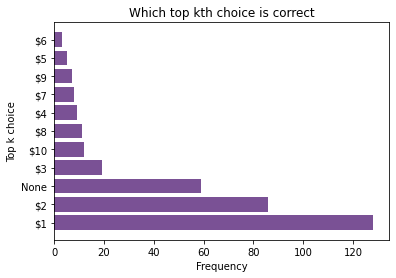

In [60]:
sorted_topk = sorted(topk.items(), key = itemgetter(1), reverse=True)
plt.barh([elt[0] for elt in sorted_topk], [elt[1] for elt in sorted_topk], align='center', color='#7a5195')
plt.title('Which top kth choice is correct')
plt.xlabel('Frequency')
plt.ylabel('Top k choice')
plt.show()

In [86]:
multitoken = {}
for elt in data:
    try:
        if elt['annotations'][0]['result'][1]['from_name'] == 'mutlitoken':
            choice = elt['annotations'][0]['result'][1]['value']['choices'][0]
            if choice in multitoken:
                multitoken[choice] += 1
            else:
                multitoken[choice] = 1
    except IndexError:
        pass
multitoken

{'Yes': 245, 'No': 98}

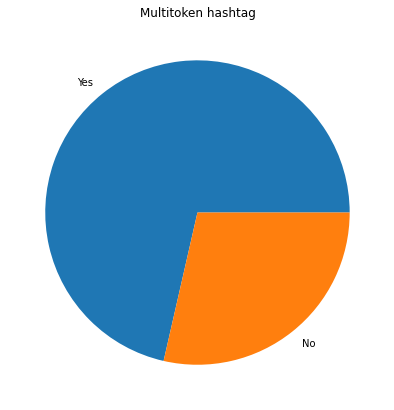

In [91]:
fig = plt.figure(figsize =(10, 7))
plt.pie(list(multitoken.values()), labels = list(multitoken.keys()))
plt.title('Multitoken hashtag')
plt.show()

In [92]:
languagemix = {}
for elt in data:
    try:
        if elt['annotations'][0]['result'][2]['from_name'] == 'languagemix':
            choice = elt['annotations'][0]['result'][2]['value']['choices'][0]
            if choice in languagemix:
                languagemix[choice] += 1
            else:
                languagemix[choice] = 1
    except IndexError:
        pass
languagemix

{'No': 216, 'Yes': 23}

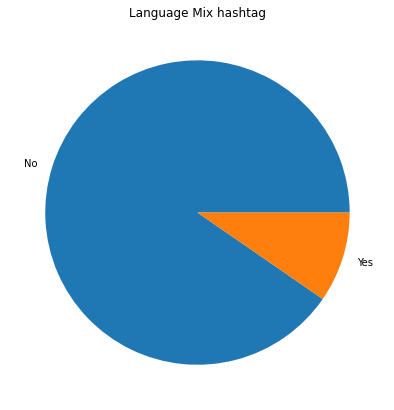

In [93]:
fig = plt.figure(figsize =(10, 7))
plt.pie(list(languagemix.values()), labels = list(languagemix.keys()))
plt.title('Language Mix hashtag')
plt.show()

In [94]:
namedentity = {}
for elt in data:
    try:
        if elt['annotations'][0]['result'][3]['from_name'] == 'namedentity':
            choice = elt['annotations'][0]['result'][3]['value']['choices'][0]
            if choice in namedentity:
                namedentity[choice] += 1
            else:
                namedentity[choice] = 1
    except IndexError:
        pass
namedentity

{'Yes': 176, 'No': 60}

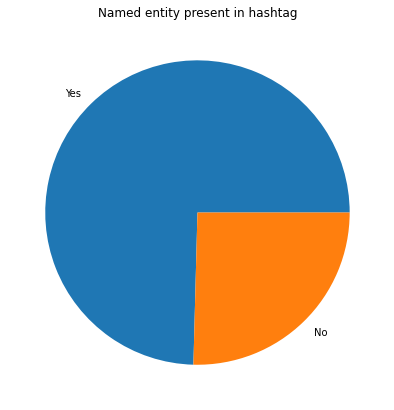

In [95]:
fig = plt.figure(figsize =(10, 7))
plt.pie(list(namedentity.values()), labels = list(namedentity.keys()))
plt.title('Named entity present in hashtag')
plt.show()

In [98]:
namedentity_indian = {}
for elt in data:
    try:
        if elt['annotations'][0]['result'][3]['from_name'] == 'namedentity_indian':
            choice = elt['annotations'][0]['result'][3]['value']['choices'][0]
            if choice in namedentity_indian:
                namedentity_indian[choice] += 1
            else:
                namedentity_indian[choice] = 1
    except IndexError:
        pass
namedentity_indian

{'No': 33, 'Yes': 38}

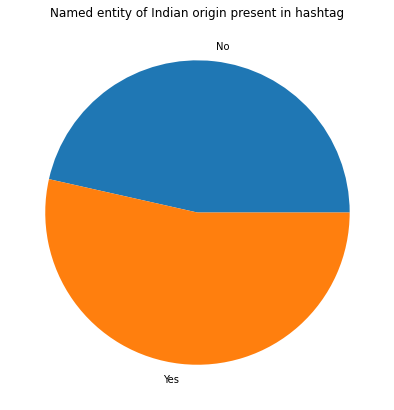

In [99]:
fig = plt.figure(figsize =(10, 7))
plt.pie(list(namedentity_indian.values()), labels = list(namedentity_indian.keys()))
plt.title('Named entity of Indian origin present in hashtag')
plt.show()

In [116]:
ner = {}
for elt in data:
    for sub_elt in elt['annotations'][0]['result']:
        if sub_elt['from_name'] == 'charner':
            choices = sub_elt['value']['labels']
            for choice in choices:
                if choice in ner:
                    ner[choice] += 1
                else:
                    ner[choice] = 1
ner

{'Person': 66,
 'Location': 25,
 'Organization': 34,
 'Language': 1,
 'Date': 1,
 'Product': 1,
 'Time': 1}

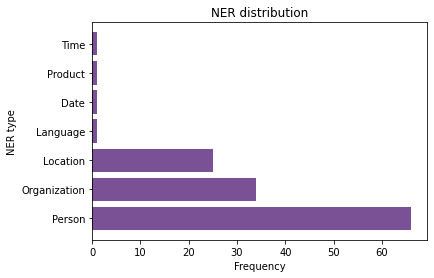

In [117]:
sorted_ner = sorted(ner.items(), key = itemgetter(1), reverse=True)
plt.barh([elt[0] for elt in sorted_ner], [elt[1] for elt in sorted_ner], align='center', color='#7a5195')
plt.title('NER distribution')
plt.xlabel('Frequency')
plt.ylabel('NER type')
plt.show()